<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/Linear_regression_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [5]:
Data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [6]:
Data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
Encoded_data = pd.get_dummies(Data)

In [8]:
Encoded_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [38]:
x = Data.drop("charges", axis = 1)
y = Data["charges"]
x.shape, y.shape

((1338, 6), (1338,))

We have 11 input columns, it means the input shape is [11]

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state = 42)

In [40]:
x_train.shape # which is exactly 80%

(1070, 6)

In [41]:
Encoded_data.isna().mean()

age                 0.0
bmi                 0.0
children            0.0
charges             0.0
sex_female          0.0
sex_male            0.0
smoker_no           0.0
smoker_yes          0.0
region_northeast    0.0
region_northwest    0.0
region_southeast    0.0
region_southwest    0.0
dtype: float64

In [42]:
Encoded_data.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

## Create min max scalar to reduce the outliers and make out put more accurate 

In [43]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [44]:
Data_transform_model = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]),
    (OneHotEncoder(handle_unknown  = "ignore"),["sex", "smoker", "region"])
)

In [45]:
Data_transform_model.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [47]:
x_train_transform = Data_transform_model.transform(x_train)
x_test_transform = Data_transform_model.transform(x_test)

In [48]:
x_train_transform.shape

(1070, 11)

In [49]:
x_test_transform.shape

(268, 11)

In [51]:
y_train.shape

(1070,)

In [80]:
from tensorflow.python.eager.monitoring import Metric
tf.random.set_seed(42)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100),
                             tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(1),
])

In [84]:
model.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

model.fit(x_train_transform, y_train, epochs = 200, verbose = 0)

In [85]:
model_loss, model_mae = model.evaluate(x_test_transform, y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 3169.2039 - mae: 3169.2039


In [86]:
model_loss, model_mae

(3169.203857421875, 3169.203857421875)

In [110]:
y_pred = model.predict(x_test_transform)


In [134]:
a = list(y_test),
b = list(y_pred)

In [137]:
a = tf.constant(a)
a = tf.squeeze(a)
a = tf.make_tensor_proto(a)
a = tf.make_ndarray(a)
b = tf.constant(b)
b = tf.squeeze(b)
b = tf.make_tensor_proto(b)
b = tf.make_ndarray(b)
type(a)

numpy.ndarray

In [140]:
(a-b).mean()

-164.31458

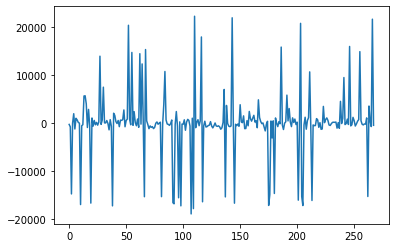

In [141]:
plt.plot(a-b)

In [148]:
list(y_pred[0:,0])

[9400.634,
 6089.157,
 44107.39,
 9343.373,
 31824.555,
 5791.136,
 1144.5779,
 13572.693,
 3626.1492,
 10296.829,
 35251.086,
 7835.6,
 4311.627,
 40539.996,
 43015.746,
 40233.156,
 10746.896,
 40149.465,
 8804.768,
 38462.094,
 4045.3125,
 8101.946,
 729.433,
 3136.9343,
 10974.272,
 11383.683,
 12422.847,
 4905.1216,
 10009.405,
 539.4798,
 8378.778,
 11824.541,
 2019.0923,
 5190.0312,
 2996.7053,
 8882.813,
 1909.9769,
 7998.7837,
 41149.48,
 36683.96,
 3104.0146,
 2360.4097,
 11787.961,
 11607.444,
 5662.7725,
 11743.113,
 3047.9182,
 3691.4014,
 39415.105,
 5256.8877,
 13381.06,
 906.5197,
 8138.898,
 941.80194,
 10968.8955,
 10653.813,
 4134.496,
 36390.133,
 11785.381,
 11143.307,
 13064.616,
 5661.2056,
 13520.927,
 8261.742,
 10755.948,
 4140.155,
 33302.027,
 10709.234,
 3162.9907,
 1990.0864,
 7269.015,
 10025.068,
 9200.472,
 7105.521,
 8329.654,
 5804.3926,
 4900.0474,
 11247.521,
 4618.468,
 9137.75,
 1236.3406,
 43446.13,
 5442.203,
 34707.87,
 33787.867,
 40476.285,
 